<a href="https://colab.research.google.com/github/anuanmol/TSF-Task-1/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>TSF Task-1</center></h1>

<h2><center>Prediction using Decision Tree Algorithm 

Let's start with What is a Decision Tree?</center>


According to **Wikipedia** "A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements."

Decision tree can be divided, with respect to target values, into:

*   Classification trees used to classify samples, assign to a limited set of values - classes. In scikit-learn it is DecisionTreeClassifier.
*   Regression trees used to assign samples into numerical values within the range. In scikit-learn it is DecisionTreeRegressor.

Here we are going to deal with classification problem, so we will opt for DecisionTreeClassifier.



Import necessary libraries

In [18]:
import io
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Import data

In [2]:
# creating a object 'uploaded' to store uploaded file
url = "https://raw.githubusercontent.com/anuanmol/TSF-Task-1/main/Iris.csv"
# uploaded = files.upload()
df = pd.read_csv(url)

In [3]:
# converting bytes stream read from the user into user readable dataframe
# df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Let's peek into our dataset

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# Getting count of different species in dataset
df['Species'].value_counts()
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

As we already saw from the dataset that there are three (**3**) different species of flowers, so is confirmed from *value_counts()* function

We have <u>**150**</u> samples and here we can see our dataset has Four independent features**(sepal length, sepal width, petal length, petal width)** and one dependent feature(class label)

All the independent features are in cm.

Target variable can be one of the three classes **["Iris-setosa", "Iris-vercicolor", "Iris-virginica"]**

Now, we need to build a **Decision Tree** capable of classifying the correct class of input given by user as independent features.


#### Slice data into features and target 

In [10]:
X_demo = df.iloc[:,1:5]
y_demo = df.iloc[:,-1]

In [19]:
# X_demo.drop(X_demo["Id"])
# X_demo.head()
y_demo.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

One hot encoding of target variables for metrics calculation

In [24]:
labelencoder = LabelEncoder()
y_label = labelencoder.fit_transform(y_demo)
y_label[-5:]
y_lbdf = pd.DataFrame(data = y_label)
y_lbdf.head()

,0
0,0
1,0
2,0
3,0
4,0


train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_demo, y_lbdf, test_size = 0.25)

#### Model Building and training

In [28]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
y_pred = clf.predict(X_train)
accu = metrics.accuracy_score(y_train, y_pred)
print(accu)

1.0


#### Plotting Decision tree

Let's now visualize our decision tree

We have various methods of visualizing our decision tree like:
*   text-representation
*   plot-tree
*   graphviz
*   dtreeviz

Let's see each one of them one by one



In [31]:
from sklearn import tree

##### text_representation gives more like a contextual idea about the split of nodes in the decision tree

Function used is **tree.export_text()**

Here each indented branch shows the split of our tree

features are used as a paramet for each split, class for each feature split is also mentioned

In [32]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.35
|   |--- class: 0
|--- feature_2 >  2.35
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_1 <= 2.25
|   |   |   |   |--- feature_2 <= 4.75
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  4.75
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  2.25
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.00
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.00
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



Using **plot_tree()** also we can visualize out tree in more refined manner.



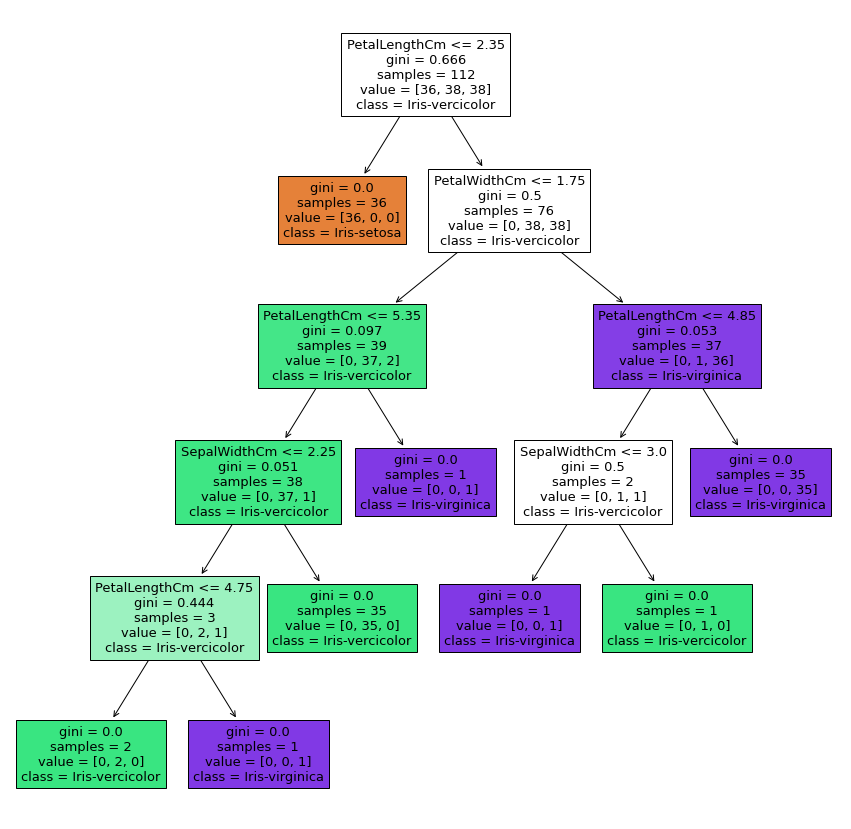

In [35]:
fig = plt.figure(figsize=(15, 15))
_ = tree.plot_tree(clf,
                   feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                   class_names=["Iris-setosa", "Iris-vercicolor", "Iris-virginica"],
                   filled= True)

For each of the hard shaded block represented by "Orange", "Purple" and "Green" shows a perfectly classified node with Gini = 0 i.e. impurity of the node = 0.

We can also do the same task using **graphviz**

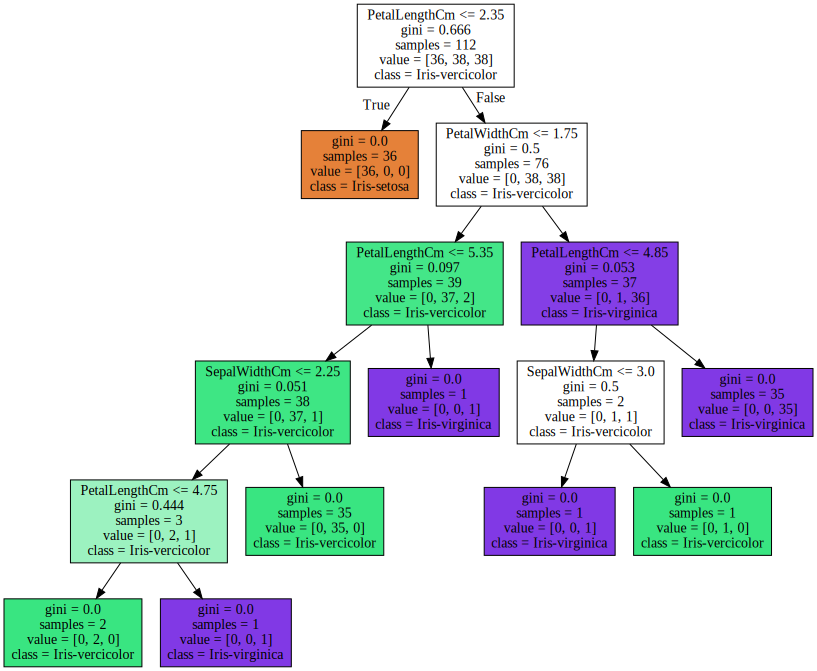

In [36]:
import graphviz

dd = tree.export_graphviz(clf,
                          feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                          class_names=["Iris-setosa", "Iris-vercicolor", "Iris-virginica"],
                          filled= True)
graph = graphviz.Source(dd, format = "png")
graph

#### There is one more way of visualizing our decison tree

It may appear a bit complex at first sight, but holds much more insighs than the previous two.

In [40]:
! pip install dtreeviz

     |████████████████████████████████| 61kB 4.8MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-cp37-none-any.whl size=66640 sha256=4e06d6f65ec715d9376a08b1eeb80c9416ff0ec2995e7315d26da5b9bbac63ce
  Stored in directory: /root/.cache/pip/wheels/60/36/b1/188ee35c677e48463f6482d580f81c19f5f82ae5adbe293fd8
Successfully built dtreeviz


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


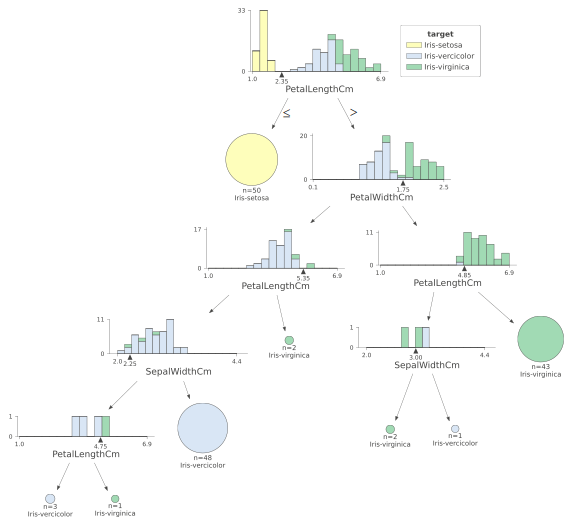

<Figure size 1800x1800 with 0 Axes>

In [46]:
from dtreeviz.trees import dtreeviz
fig = plt.figure(figsize=(25, 25))
viz = dtreeviz(clf, X_demo, y_label,
               target_name = "target",
               feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
               class_names=["Iris-setosa", "Iris-vercicolor", "Iris-virginica"])
viz

So this was all about fitting data to a decision tree and them visualizing it using different techniques.